In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [3]:
df = pd.read_csv('../../datasets/checker_submits.csv', parse_dates=['timestamp'])
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [4]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.drop(columns= 'timestamp', inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [5]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
category = onehotencoder.fit_transform(df[['uid','labname']]).toarray()
names = onehotencoder.get_feature_names_out(['uid', 'labname'])
x = pd.DataFrame(category, columns= names)
df = pd.concat([df, x], axis=1)
df.drop(columns=['labname', 'uid'], inplace=True)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
scale = StandardScaler()
df[['numTrials', 'hour']] = scale.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df.to_csv('../../datasets/dayofweek.csv', index=False)

In [8]:
y=df['dayofweek']
most_popular_class = [y.mode().values]* len(y)
accuracy_score(y, most_popular_class)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [9]:
lr = LogisticRegression(random_state=21, fit_intercept=False)

In [10]:
X = df.drop(columns = 'dayofweek')
lr.fit(X,y)
predict = lr.predict(X)
accuracy_score(y, predict)

0.6405693950177936

In [11]:
def plot(coef, features, n =10):
    fig, ax = plt.subplots(figsize=(15, 8))
    coef /= coef.sum()
    indices = coef.argsort()[::-1][:n]
    ax.barh(np.arange(n), coef[indices])
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis()
    plt.show()

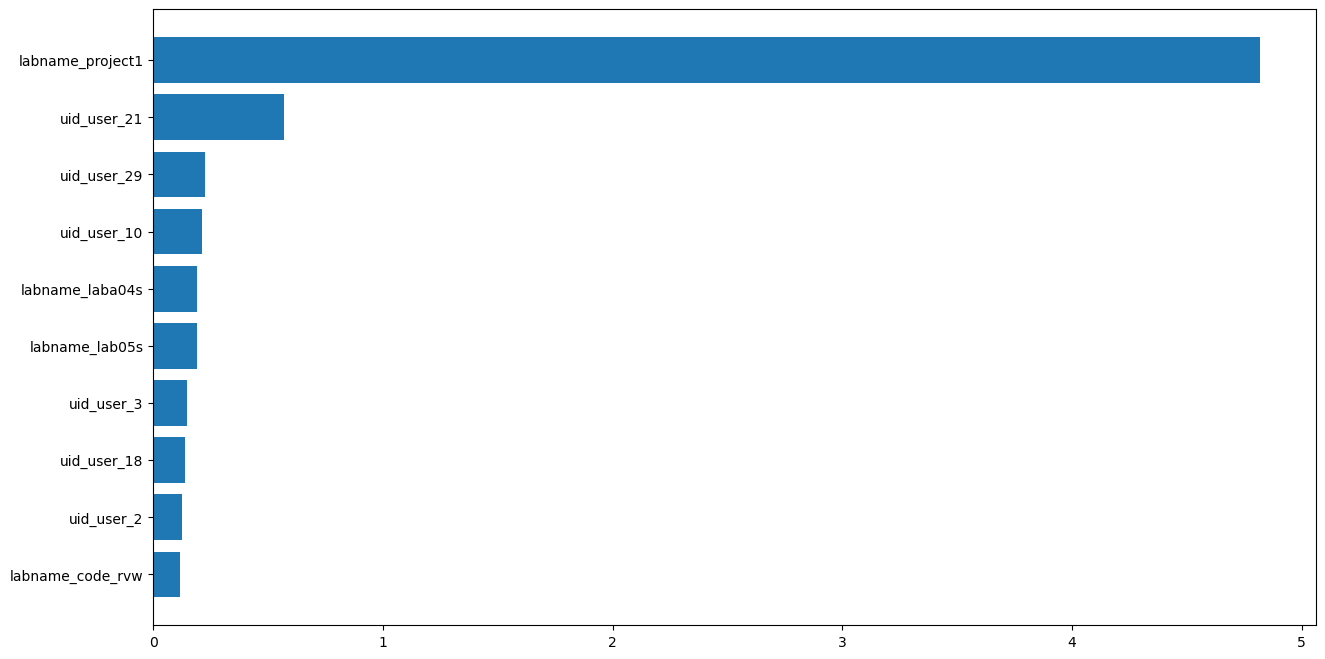

In [12]:
plot(lr.coef_.mean(axis=0), X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [13]:
svc = SVC(probability=True, random_state=21)
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
gs = GridSearchCV(svc, param_grid, scoring='accuracy')
gs.fit(X, y)
gs.best_params_

{'kernel': 'poly'}

In [14]:
scv = SVC(kernel='linear', probability=True, random_state= 21)
scv.fit(X,y)
predict = scv.predict(X)
accuracy_score(y,predict)

0.702846975088968

In [15]:
SCV_rbf = SVC(kernel='rbf', probability=True, random_state= 21)
SCV_rbf.fit(X,y)
accuracy_score(y,SCV_rbf.predict(X))

0.8558718861209964

In [16]:
SCV_poly = SVC(kernel='poly', probability=True, random_state= 21)
SCV_poly.fit(X,y)

accuracy_score(y,SCV_poly.predict(X))

0.8594306049822064

In [17]:
SCV_sig = SVC(kernel='sigmoid', probability=True, random_state= 21)
SCV_sig.fit(X,y)

accuracy_score(y,SCV_sig.predict(X))

0.3997627520759193

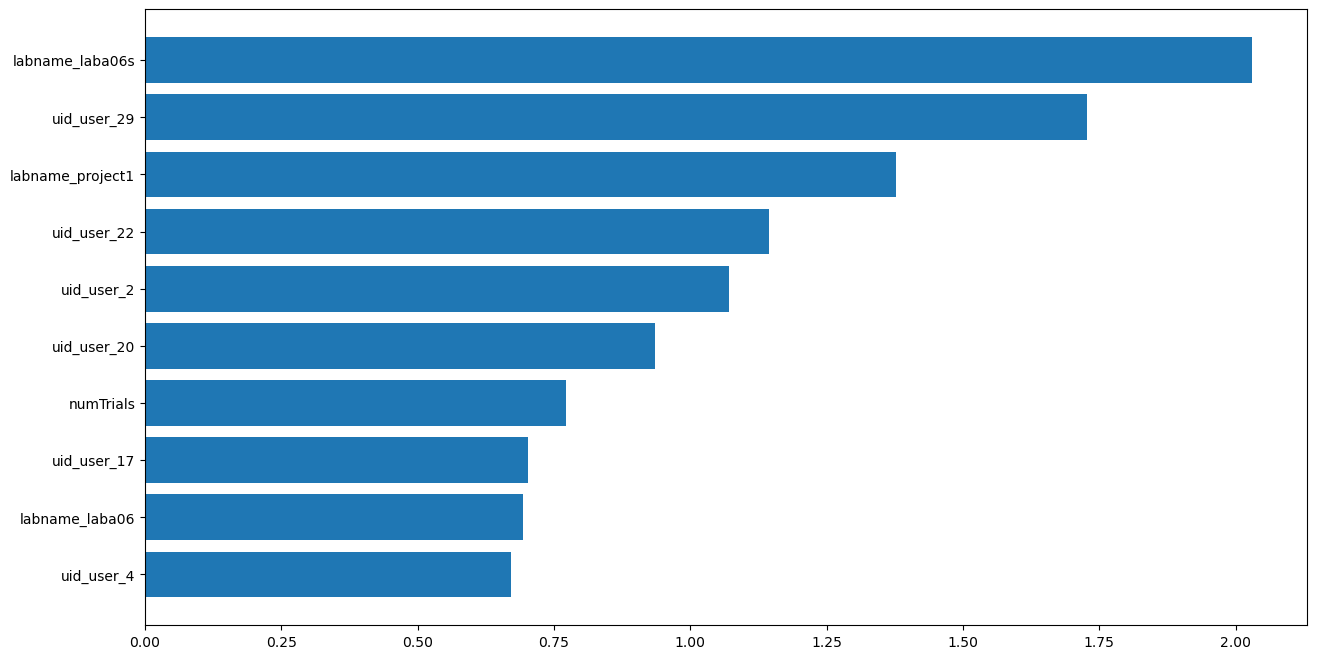

In [18]:
plot(scv.coef_.mean(axis=0),X.columns)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [19]:
dtc4 =DecisionTreeClassifier(max_depth= 4, random_state= 21)
dtc4.fit(X,y)
accuracy_score(y,dtc4.predict(X))

0.5516014234875445

In [20]:
dtc2 =DecisionTreeClassifier(max_depth= 2, random_state= 21)
dtc2.fit(X,y)
accuracy_score(y, dtc2.predict(X))

0.4389086595492289

In [21]:
dtc10 =DecisionTreeClassifier(max_depth= 10, random_state= 21)
dtc10.fit(X,y)
accuracy_score(y, dtc10.predict(X))

0.8196915776986952

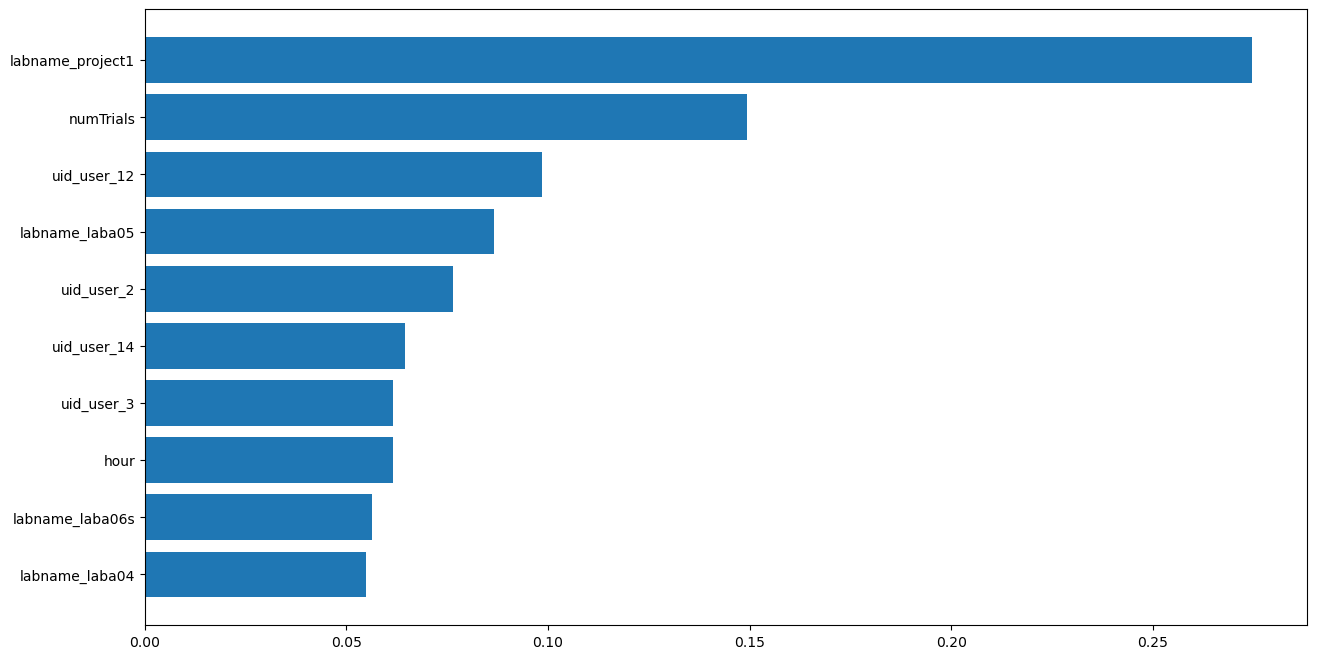

In [22]:
plot(dtc4.feature_importances_, X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [23]:
rfr = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rfr.fit(X, y)
accuracy_score(y, rfr.predict(X))

1.0

In [24]:
rfr2 = RandomForestClassifier(n_estimators=50, max_depth=25, random_state=21)
rfr2.fit(X, y)
accuracy_score(y, rfr2.predict(X))

1.0

In [25]:
rfr3 = RandomForestClassifier(n_estimators=120, max_depth=25, random_state=21)
rfr3.fit(X, y)
accuracy_score(y, rfr3.predict(X))

0.9994068801897983

In [26]:
rfr4 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=21)
rfr4.fit(X, y)
accuracy_score(y, rfr4.predict(X))

0.8855278766310795

In [27]:
rfr5 = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=21)
rfr5.fit(X, y)
accuracy_score(y, rfr5.predict(X))

1.0

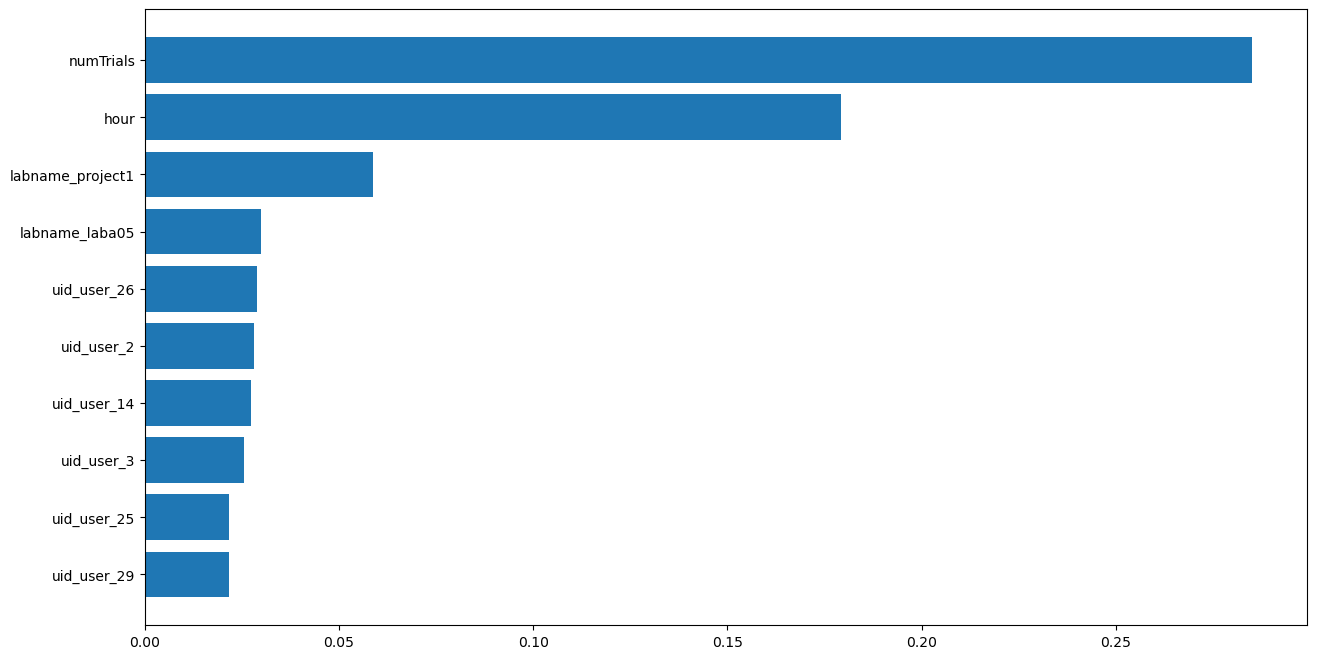

In [28]:
plot(rfr.feature_importances_, X.columns)